In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('B2W-Reviews01.csv')

/var/folders/vb/q6czv8r938d0bnqp76zgy5km0000gn/T/ipykernel_20827/1153590322.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('B2W-Reviews01.csv')


In [3]:
df

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,NaN,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,NaN,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,NaN,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


In [4]:
df = df.dropna(subset=['review_text'])

In [5]:
df['review_text']

0         Estou contente com a compra entrega rápida o ú...
1         Por apenas R$1994.20,eu consegui comprar esse ...
2         SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3         MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4         A entrega foi no prazo, as americanas estão de...
                                ...                        
132368    Vale muito, estou usando no controle do Xbox e...
132369    Prático e barato, super indico o produto para ...
132370    Chegou antes do prazo previsto e corresponde a...
132371    Material fraco, poderia ser melhor. Ficou deve...
132372    Comprei esse produto, quando chegou estava com...
Name: review_text, Length: 129098, dtype: object

In [6]:
df['label'] = df['overall_rating'].apply(lambda x: 0 if x <=3 else 1)

/var/folders/vb/q6czv8r938d0bnqp76zgy5km0000gn/T/ipykernel_20827/3782466327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['overall_rating'].apply(lambda x: 0 if x <=3 else 1)


In [7]:
df['label']

0         1
1         1
2         1
3         1
4         1
         ..
132368    1
132369    1
132370    1
132371    0
132372    0
Name: label, Length: 129098, dtype: int64

In [10]:
df['label'].value_counts()

1    79316
0    49782
Name: label, dtype: int64

In [12]:
X = df['review_text']
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [21]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
model = classifier.fit(X_train_vec, y_train)

In [22]:
model.predict(X_test_vec)

array([1, 1, 0, ..., 1, 1, 0])

In [24]:
X_test.loc[66224]

'Gostei do material, o violão é leve e tem boa sonorização, porém o detalhe é que o kit não é tão completo assim como diz a propaganda. O violão não vem com a roldana fixada para colocar a Correia, nem tão pouco mandaram junto a roldana para que fosse afixada posteriormente. Então quem vier a comprar o produto se prepare para investir mais um dinheirinho (valor mínimo de 15,00) para tornar o produto completo. De resto sem problemas.'

In [25]:
df.loc[66224]

submission_date                                        2018-03-22 06:32:41
reviewer_id              242266d87e96053c89ea56618ba41082294ca1dc4ab210...
product_id                                                        18541480
product_name             Kit Violão Giannini Flat Eletroacústico Nf14 B...
product_brand                                                          NaN
site_category_lv1                                    Instrumentos Musicais
site_category_lv2                                                      NaN
review_title                                   Gostei do violão, porém...!
overall_rating                                                           3
recommend_to_a_friend                                                  Yes
review_text              Gostei do material, o violão é leve e tem boa ...
reviewer_birth_year                                                 1980.0
reviewer_gender                                                          M
reviewer_state           

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test_vec))

0.8543377226955848

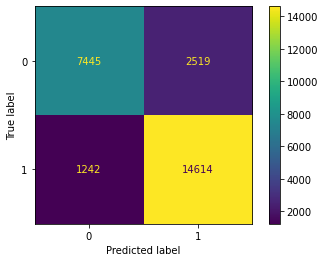

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model.predict(X_test_vec))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()

In [36]:
my_input = 'não gostei do produto, não foi muito barato'
my_input = tfidf.transform([my_input])
model.predict(my_input)

array([0])

In [37]:
classifier.class_count_

array([39818., 63460.])

In [40]:
classifier.feature_count_[0]

array([71.10288227,  9.51773299,  0.46260314, ...,  0.        ,
        0.        ,  0.        ])

In [49]:
tfidf.get_feature_names_out()[2000:2010]

array(['absurdooooooooooooooooooo', 'absurdos', 'absuro',
       'absuroooooooooooooooooooooooooo', 'absusrdo', 'abto', 'abundante',
       'abundância', 'abusando', 'abusar'], dtype=object)

In [50]:
classifier.feature_count_[0][2000:2010]

array([0.36115483, 1.31020593, 0.2602684 , 0.67912031, 0.45145891,
       0.28398471, 0.        , 0.2644584 , 0.39946476, 0.57225871])

In [51]:
classifier.feature_count_[1][2000:2010]

array([0.        , 0.54931623, 0.        , 0.        , 0.        ,
       0.        , 0.37086102, 0.5422437 , 0.        , 0.        ])